In [1]:
from upload_hypersim import upload_images 
import process as proc
import utils_methods as util

import os
import random

import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as lsc
import torch
import h5py

import itertools
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

from deeplsd.utils.tensor import batch_to_device
from deeplsd.models.deeplsd_inference import DeepLSD


In [2]:
random.seed(10)

# Import the Deeplsd model

In [2]:
# Model config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
conf = {
    'detect_lines': True,  
    'line_detection_params': {
        'merge': False,  
        'filtering': True,  
        'grad_thresh': 3,
        'grad_nfa': True, 
    }
}

# Load the model
ckpt = '../weights/deeplsd_md.tar'
ckpt = torch.load(str(ckpt), map_location='cpu')
net = DeepLSD(conf)
net.load_state_dict(ckpt['model'])
net = net.to(device).eval()

# Download the data

In [3]:
#Define what to import
frame_str = "0001"
# images
desired_images = [
    "ai_001_001",
    "ai_001_004",
    "ai_001_005",
    "ai_001_006",
    "ai_001_007",
    "ai_001_008",
    "ai_001_009",
]
#files
files_to_download = [
    f"frame.{frame_str}.color.jpg",
    f"frame.{frame_str}.depth_meters.hdf5",
    f"frame.{frame_str}.normal_world.hdf5",
    f"frame.{frame_str}.normal_bump_world.hdf5",
    f"frame.{frame_str}.position.hdf5"
]

In [5]:
# Download
upload_images(desired_images, files_to_download)

Base data folder data already exists.


# Structural - Textural Classification

In [5]:
# Define the data directory and the images to process
base_data_dir = "data"
image_ids = desired_images


[Parameter Comparison] Processing image: ai_001_001 for frame 0001
data/ai_001_001/ai_001_001/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_001: Detected 414 lines; 64 classified as structural.


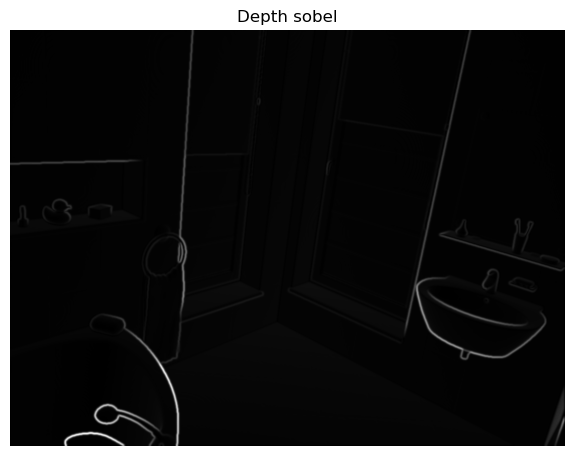

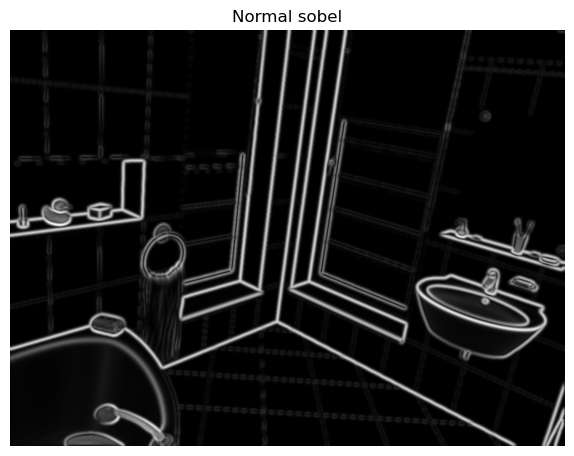

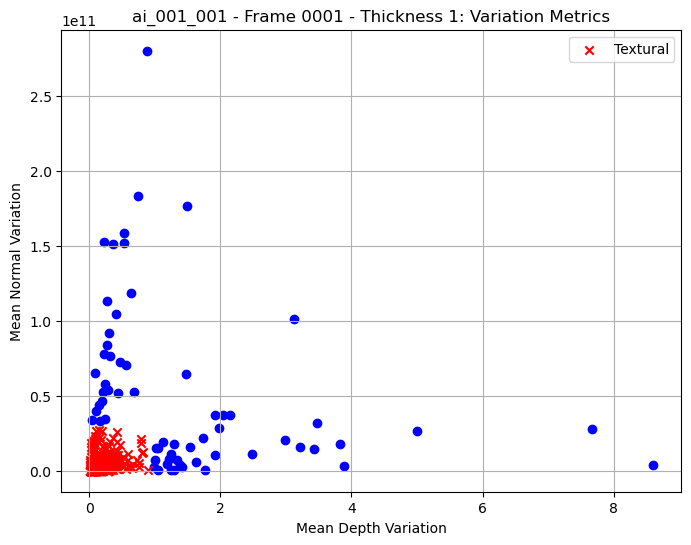

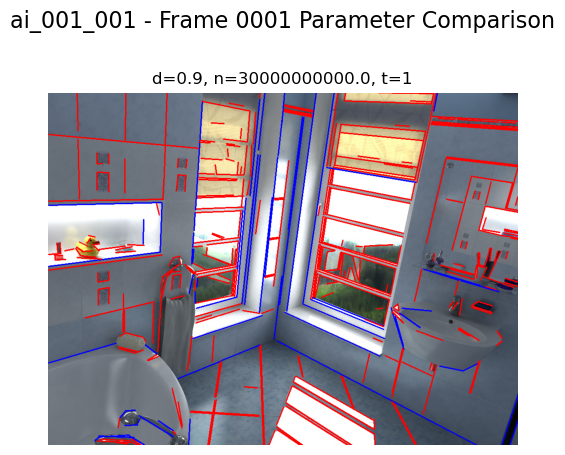

Saved parameter comparison grid to data/ai_001_001/parameter_comparison_0001.png

[Parameter Comparison] Processing image: ai_001_004 for frame 0001
data/ai_001_004/ai_001_004/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_004: Detected 337 lines; 98 classified as structural.


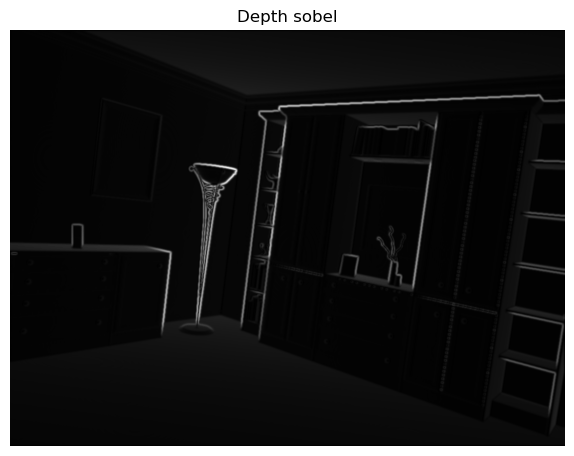

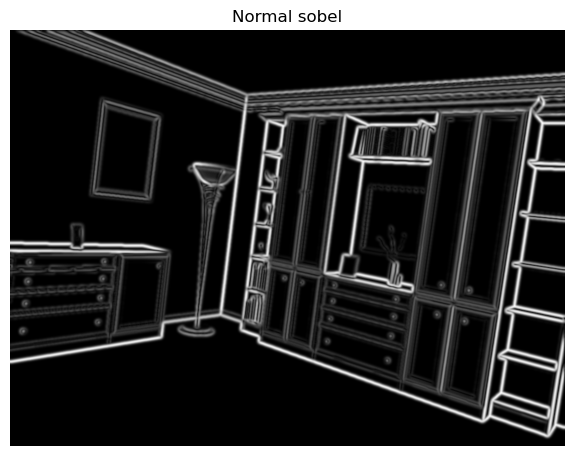

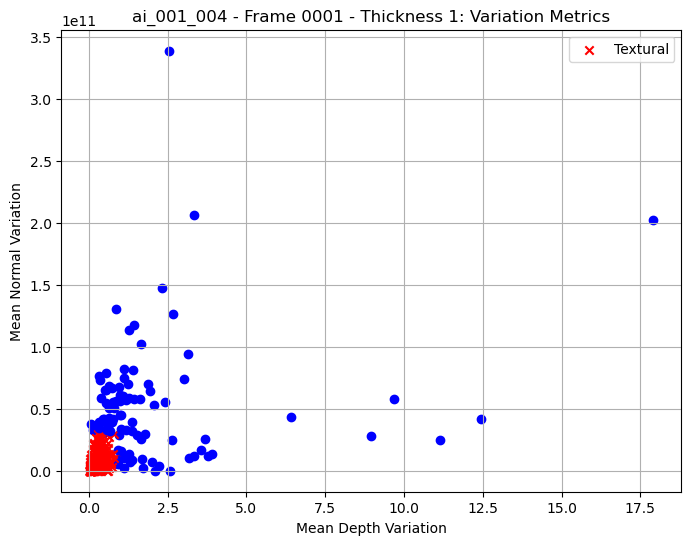

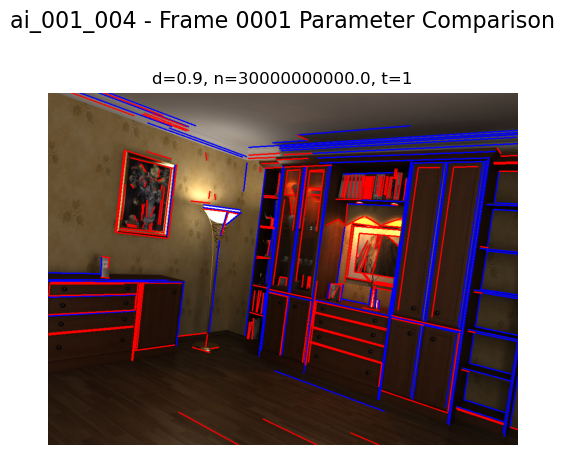

Saved parameter comparison grid to data/ai_001_004/parameter_comparison_0001.png

[Parameter Comparison] Processing image: ai_001_005 for frame 0001
data/ai_001_005/ai_001_005/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_005/ai_001_005/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_005/ai_001_005/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_005: Detected 491 lines; 259 classified as structural.


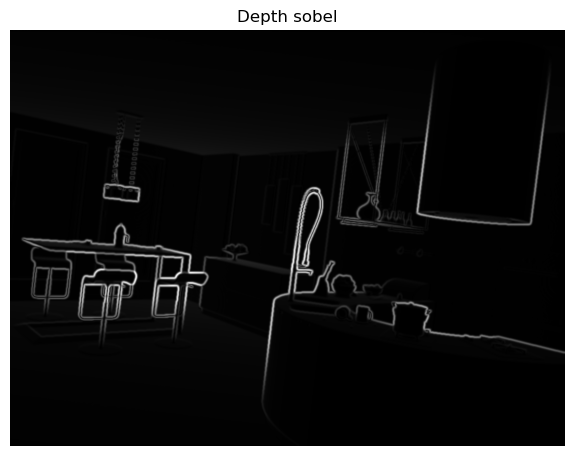

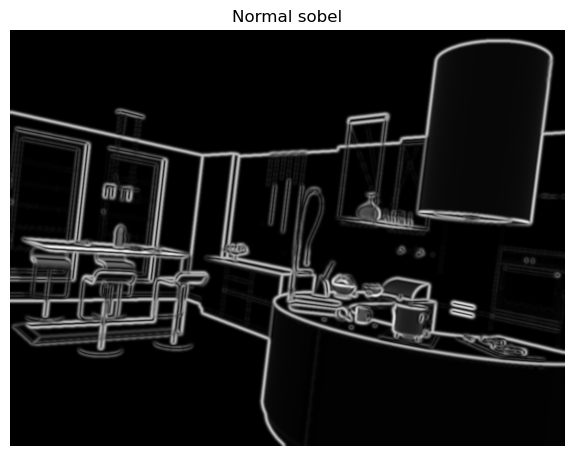

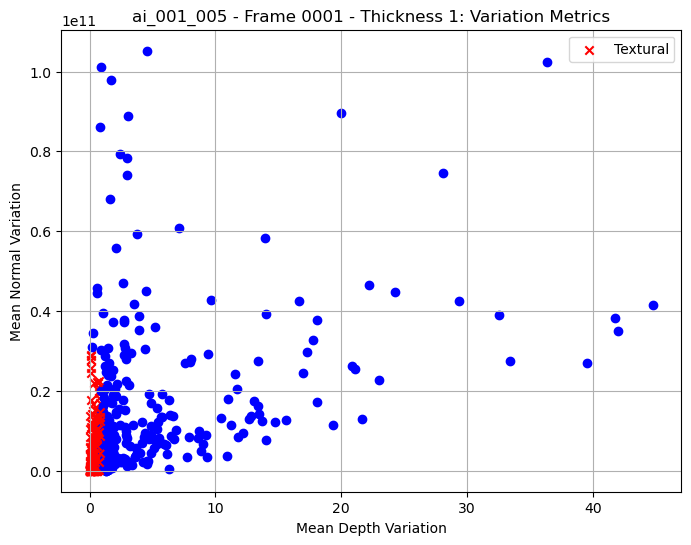

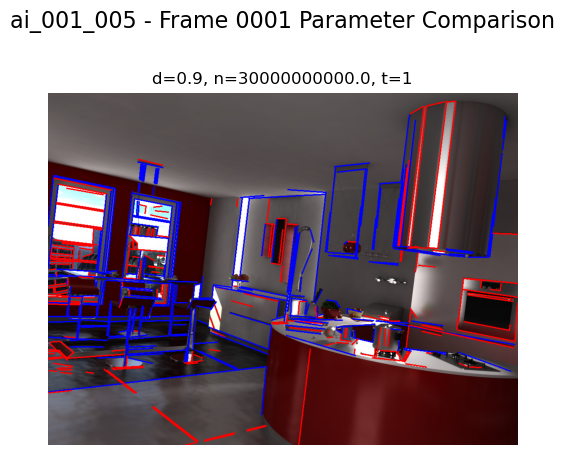

Saved parameter comparison grid to data/ai_001_005/parameter_comparison_0001.png

[Parameter Comparison] Processing image: ai_001_006 for frame 0001
data/ai_001_006/ai_001_006/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_006/ai_001_006/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_006/ai_001_006/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_006: Detected 491 lines; 90 classified as structural.


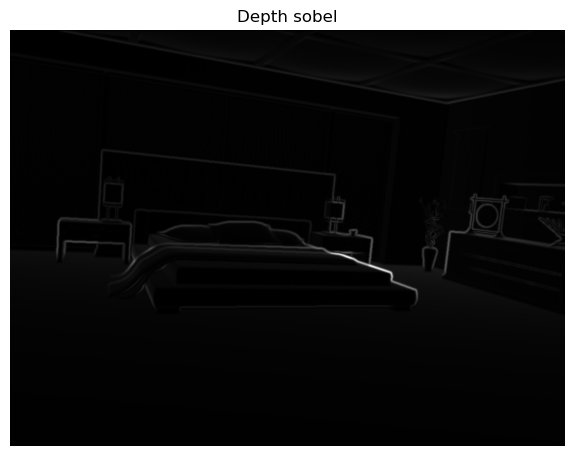

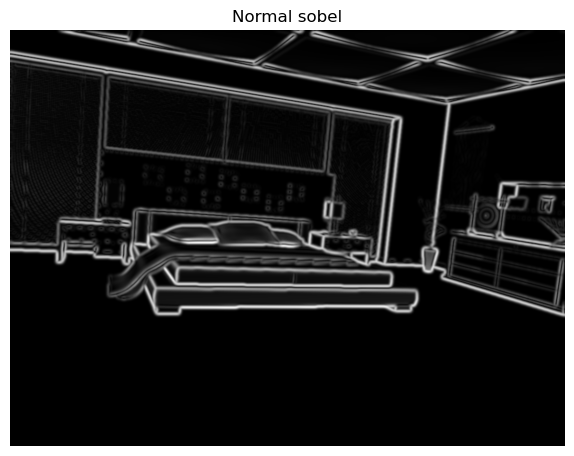

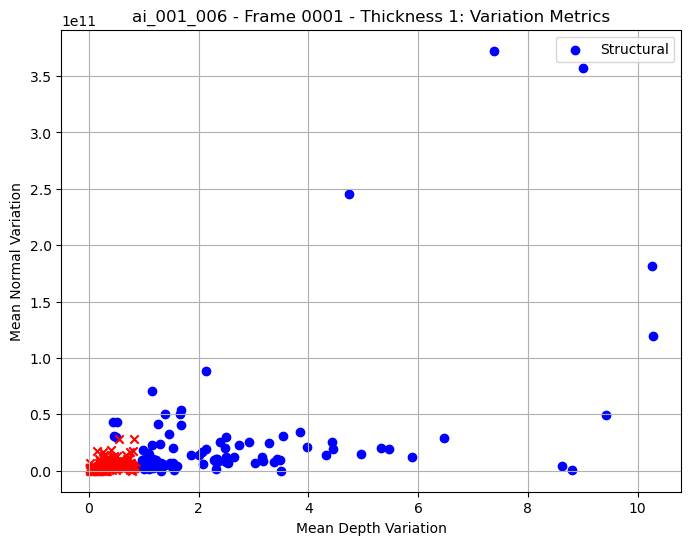

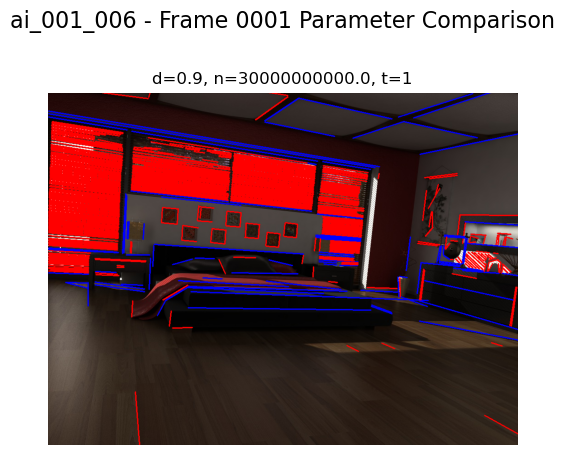

Saved parameter comparison grid to data/ai_001_006/parameter_comparison_0001.png

[Parameter Comparison] Processing image: ai_001_007 for frame 0001
data/ai_001_007/ai_001_007/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_007/ai_001_007/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_007/ai_001_007/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_007: Detected 507 lines; 96 classified as structural.


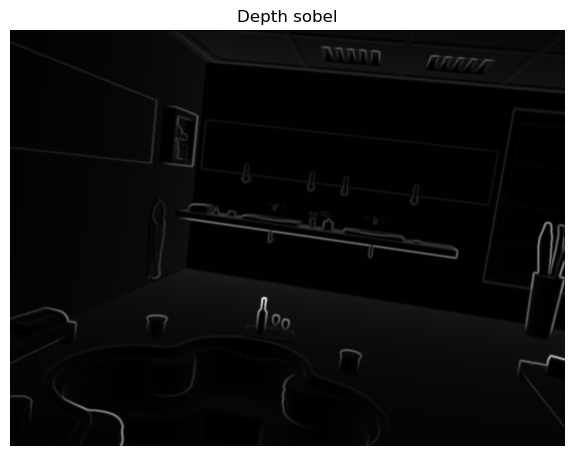

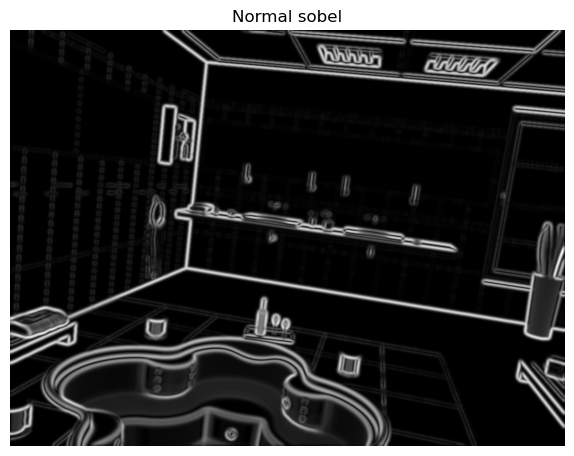

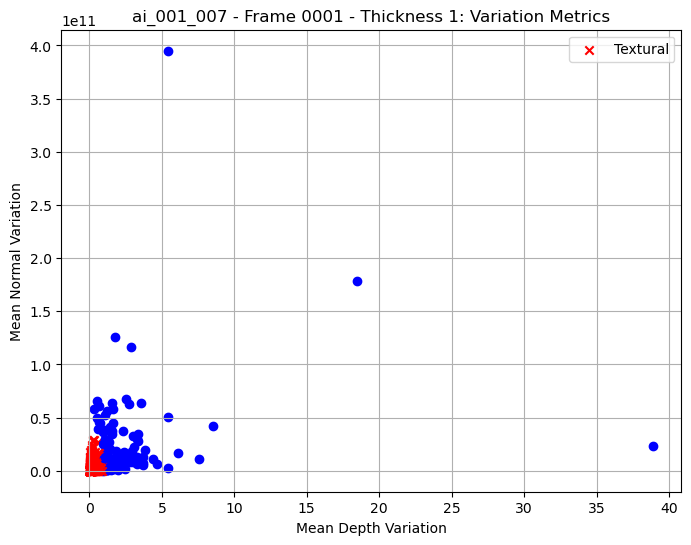

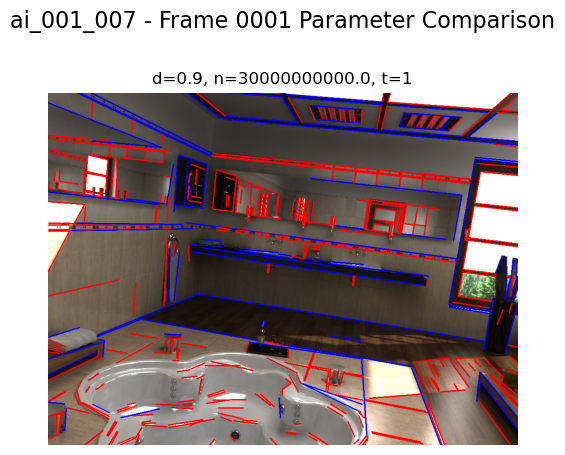

Saved parameter comparison grid to data/ai_001_007/parameter_comparison_0001.png

[Parameter Comparison] Processing image: ai_001_008 for frame 0001
data/ai_001_008/ai_001_008/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_008/ai_001_008/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_008/ai_001_008/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_008: Detected 441 lines; 125 classified as structural.


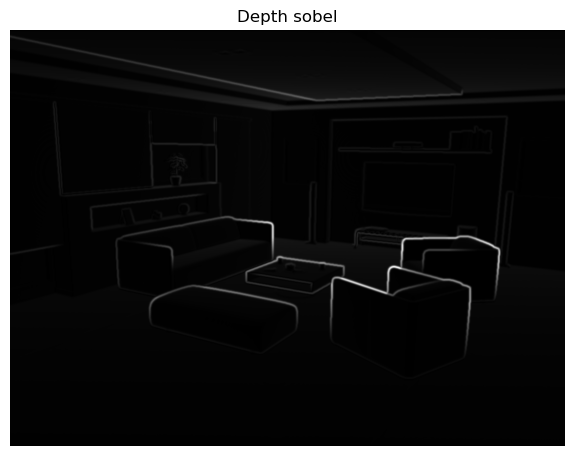

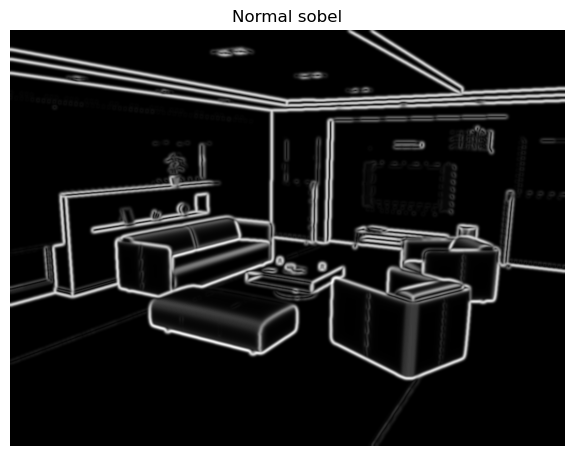

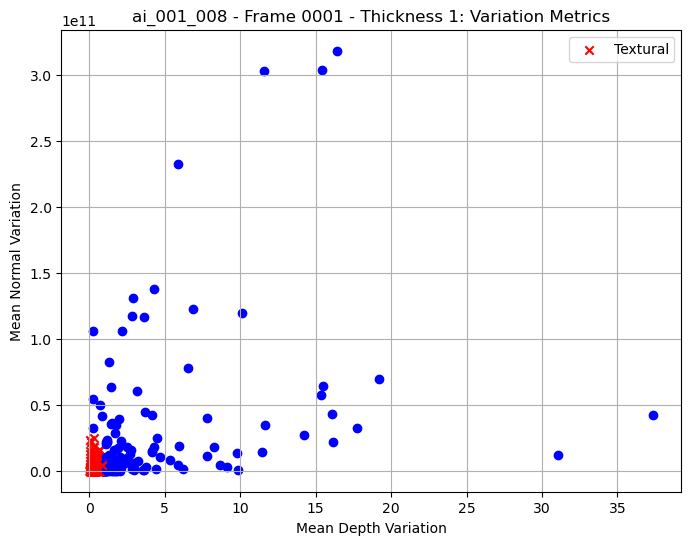

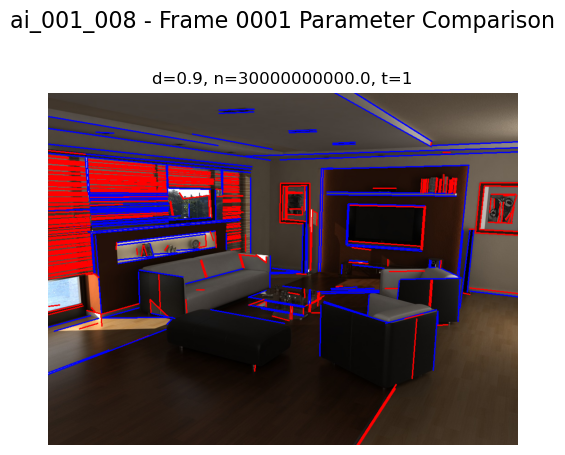

Saved parameter comparison grid to data/ai_001_008/parameter_comparison_0001.png

[Parameter Comparison] Processing image: ai_001_009 for frame 0001
data/ai_001_009/ai_001_009/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_009/ai_001_009/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_009/ai_001_009/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_009: Detected 207 lines; 112 classified as structural.


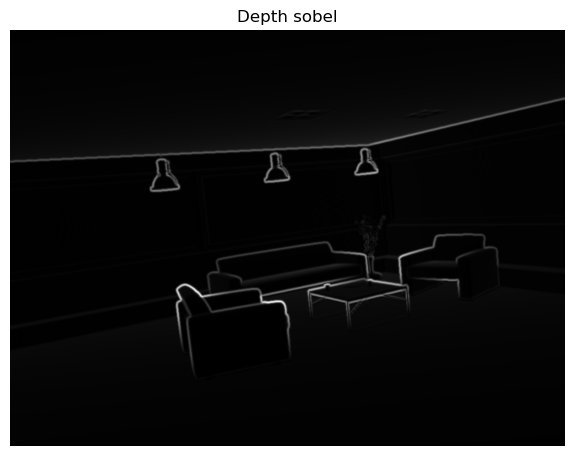

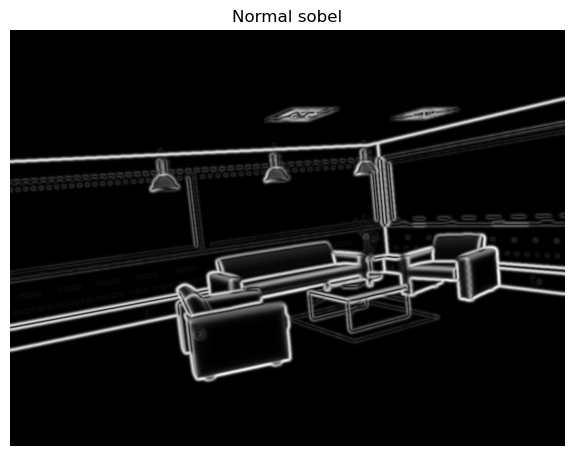

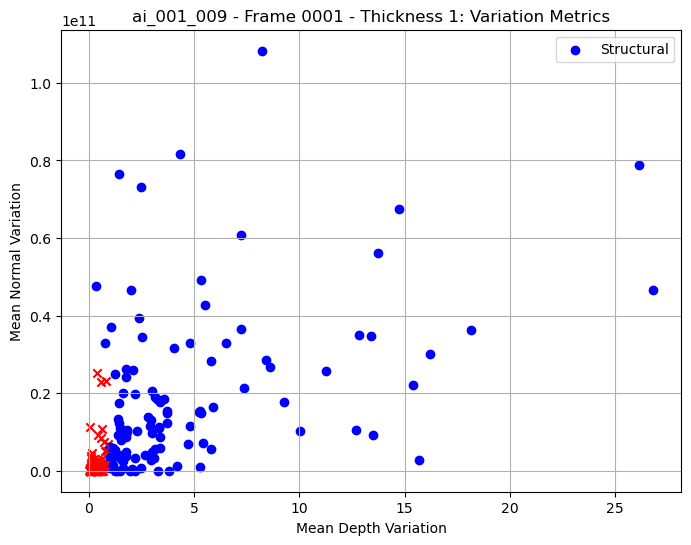

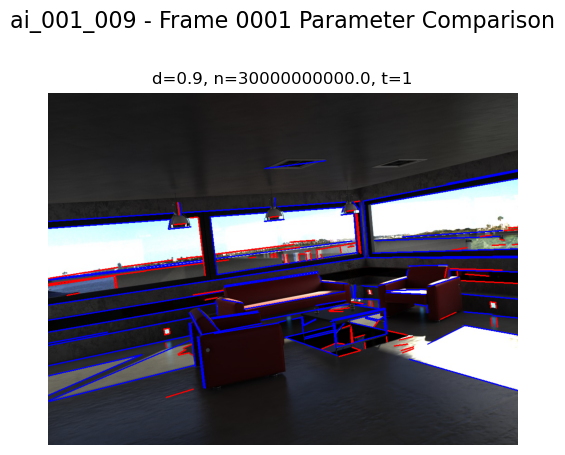

Saved parameter comparison grid to data/ai_001_009/parameter_comparison_0001.png


In [8]:
# Define arrays for each parameter
depth_thresholds = [0.9]     
normal_thresholds = [0.30*1e11]      #Too high
thickness_values = [1]   
n_columns = 1


process.plot_process(image_ids, base_data_dir, frame_str, depth_thresholds, normal_thresholds,
                     thickness_values, line_detection_model=net, device=device, n_columns=n_columns,
                     depth_normal_func=np.mean, depth_normal_func_str="Mean", 
                     norm_agg_func=LA.norm)


# Coplanarity

data/ai_001_001/ai_001_001/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
Unique labels: 1728


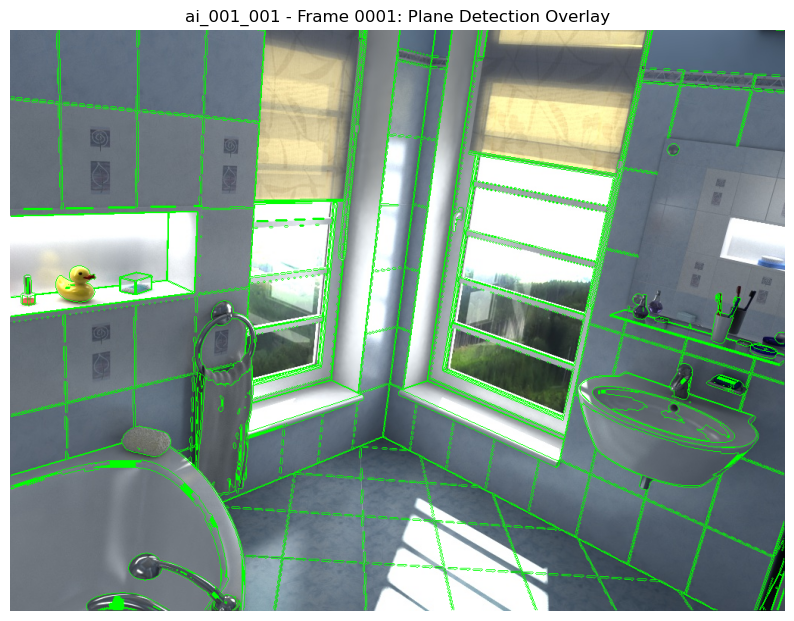

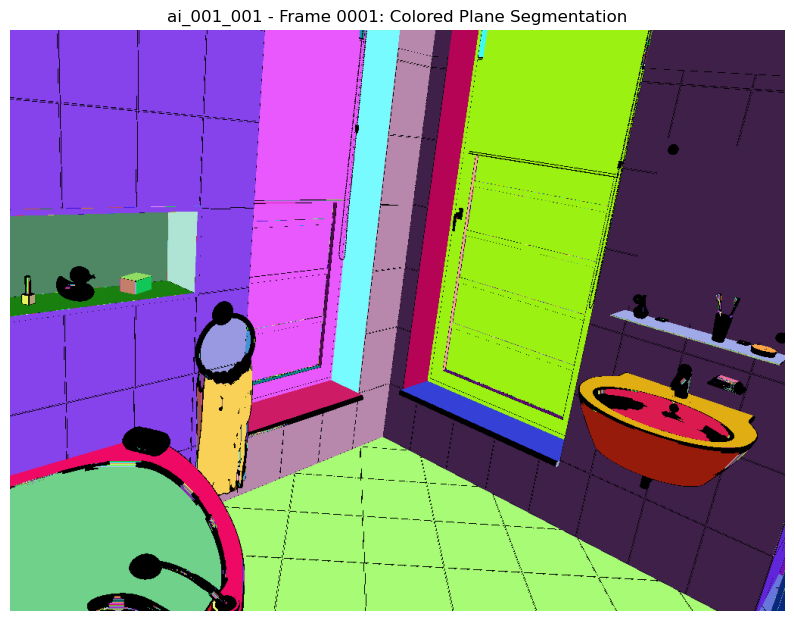

In [4]:
base_data_dir = "data"
image_id = "ai_001_001"
frame_str = "0001"
image_dir = os.path.join(base_data_dir, image_id)
composite_planes, colored_seg = proc.process_image_with_plane_detection_and_color_plot(
    image_dir, image_id, frame_str, spatial_weight=0.05, depth_weight=10, eps=0.05, 
    min_samples=5, sample_rate=1, threshold=0.05)


data/ai_001_004/ai_001_004/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
Unique labels: 1835


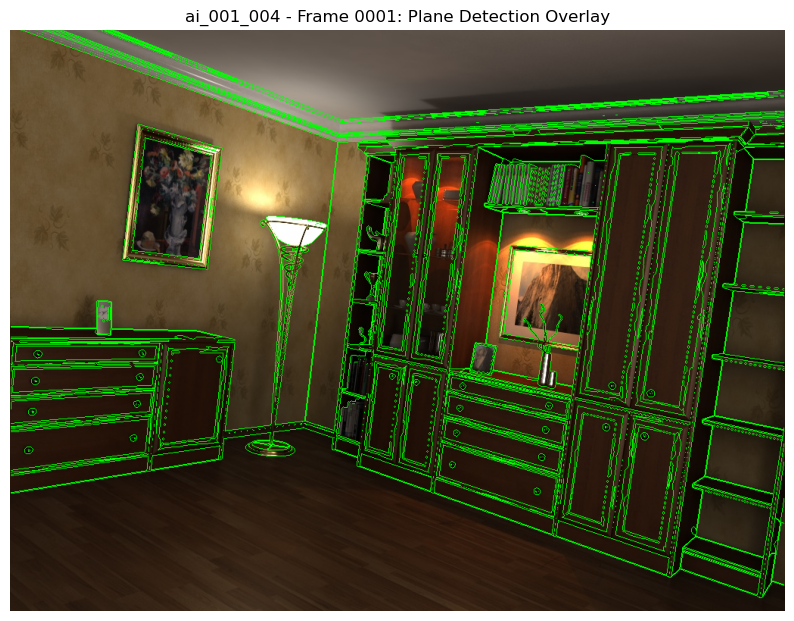

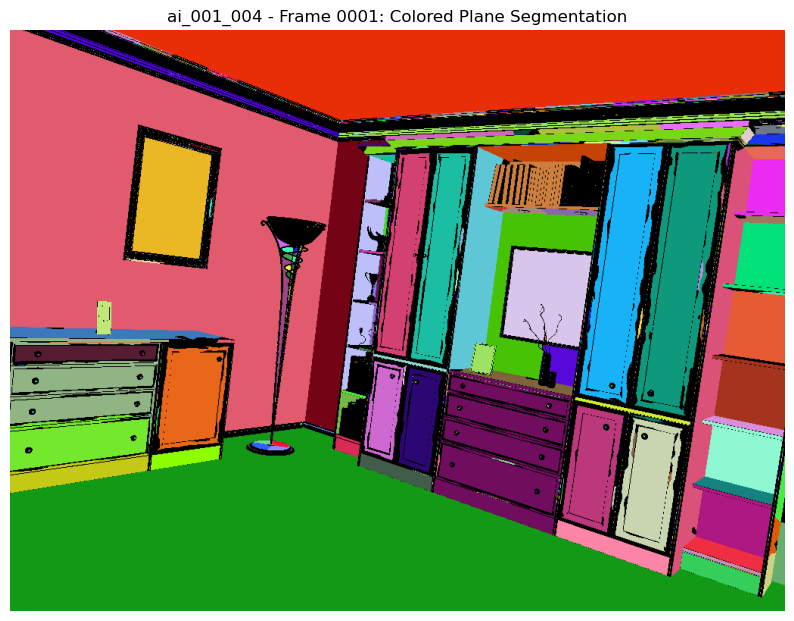

In [8]:
base_data_dir = "data"
image_id = "ai_001_004"
frame_str = "0001"
image_dir = os.path.join(base_data_dir, image_id)
composite_planes, colored_seg = util.process_image_with_plane_detection_and_color_plot(
    image_dir, image_id, frame_str, spatial_weight=0.5, depth_weight=1.0, eps=0.05, 
    min_samples=5, sample_rate=0.05, threshold= 100000)


